In [1]:
import Simulate as Sim
import numpy as np
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Aging_Condensate/Gillespie_backend')
import Gillespie_backend as Gil
from multiprocessing import Pool

In [6]:
class Simulation(Sim.ParallelSimulation):
    def __init__(self,gillespie_param,simulation_param,cpu_param):
        super().__init__(gillespie_param,simulation_param,cpu_param)
        self.R = dict()
        self.move = dict()
        self.time=0
    def extract_parameter(self, gillespie, moves, time,step,name):
        return {"R_"+name+"_"+str(step):gillespie.get_R(),"time_"+name+"_"+str(step):np.sum(time),"move_"+name+"_"+str(step):moves}
    
    def unpack_res(self, res):
        return res

In [7]:
gillespie_params =  {'ell_tot':100,'rho0':0.,'BindingEnergy':np.array([-i -20 for i in range(10)]),'kdiff':1.,'seed':[np.random.randint(0,10000) for _ in range(10)],'sliding':False,'Nlinker':3,'old_gillespie':None,'dimension':3}
simulation_param = {'step_tot' : 1000, 'dump_step':100,'label_key':'BindingEnergy'}
cpu_param = {'Nnodes':10}

In [8]:
sim = Simulation(gillespie_params,simulation_param,cpu_param)

In [9]:
sim.Parallel_Run()

[{'R_-20_100': array([[0., 0., 0.]]),
  'time_-20_100': 50.007930040324865,
  'move_-20_100': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
  'R_-20_200': array([[0., 0., 0.]]),
  'time_-20_200': 47.69876568634879,
  'move_-20_200': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
  'R_-20_300': array([[0., 0., 0.]]),
  'time_-20_300': 51.45554871804804,
  'move_-20_300': array([1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
# test graph visualisation:
import networkx as nx
import gravis as gv
import matplotlib.pyplot as plt
import numpy as np
import sys
from multiprocessing import Pool
sys.path.append("/home/hcleroy/PostDoc/aging_condensates/Simulation/Aging_Condensate/Gillespie_backend")
import Gillespie_backend as backend
sys.path.append('/home/hcleroy/Extra_Module_py/')
import formated_matplotlib
import graph
from sklearn.decomposition import PCA

In [21]:
# define the unit of the system :
dimension = 3

L = 10000
NLinker = 30

Eb = -30.

kdiff = 0.000207352*5

seed = np.random.randint(0,1000000)

In [28]:
Sys = backend.Gillespie(  ell_tot=L,
                    rho0=0.,
                    BindingEnergy=Eb,
                    kdiff=kdiff/10,
                    seed = seed,
                    Nlinker=NLinker,dimension=dimension) 

In [39]:
move,time = Sys.evolve(10**5)

(array([31034.,     0.,     0., 37931.,     0.,     0.,     0.,     0.,
            0., 31035.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

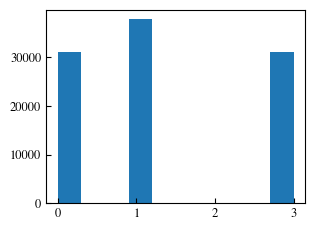

In [40]:
plt.hist(move)

(<Figure size 334.646x251.613 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

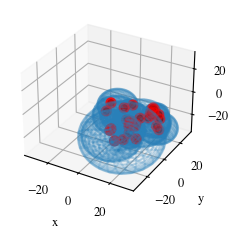

In [41]:
Sys.Plot3DGillespie()

In [42]:
X = Sys.get_R()
X_std = (X - X.mean(axis=0)) / X.std(axis=0)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

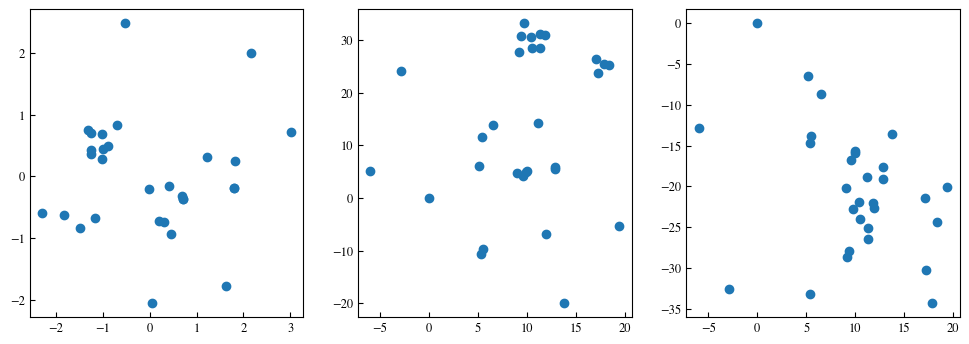

In [43]:
fig,ax = plt.subplots(ncols = 3,figsize=(12,4))
ax[0].scatter(X_pca[:, 0], X_pca[:, 1])
ax[1].scatter(X[:,0],X[:,1])
ax[2].scatter(X[:,0],X[:,2])